#Lab 8: Linear Classifiers
Instructions
You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final rendered file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

In [33]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
#i got chat to help with automation for the code, such as making loops for part 3 q3 and making param grids.
#also used it to comment out the code

##Part One: Binary Classification
Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

Report the (cross-validated!) metric.

Fit the final model.

Output a confusion matrix.

In [5]:
df = pd.read_csv("/content/cannabis_full.csv")
df.dropna(inplace=True)
df.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
type1 = df[(df["Type"] == "sativa") | (df["Type"] == "indica")]

###Q1: LDA

In [7]:
X = type1.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y= type1["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object))
  ],
  remainder = "passthrough"
).set_output(transform = "pandas")


Best params: {'lda__shrinkage': 0.5, 'lda__solver': 'lsqr'}
Best score: 0.87703474372205
Confusion Matrix for LDA:
[[495  47]
 [ 50 262]]


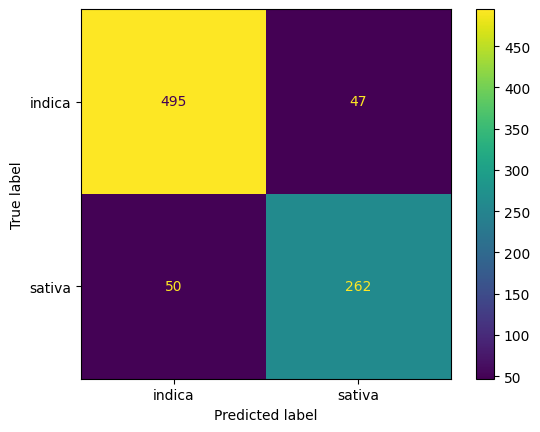

In [34]:
lda_pipe = Pipeline([
    ("ct", ct),
    ("lda", LinearDiscriminantAnalysis())
])

# Parameter grid
paramgridlda = {
    "lda__solver": ["lsqr"],
    "lda__shrinkage": [None, 'auto',.5]
}

# GridSearchCV
lda_grid = GridSearchCV(lda_pipe, param_grid=paramgridlda, cv=5, scoring="accuracy",verbose=0, n_jobs=-1, error_score="raise")
lda_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best params: {lda_grid.best_params_}")
print(f"Best score: {lda_grid.best_score_}")

lda_final_model = lda_grid.best_estimator_
y_pred_lda = lda_final_model.predict(X_train)
conf_matrix_lda = confusion_matrix(y_train, y_pred_lda)
ConfusionMatrixDisplay(conf_matrix_lda, display_labels=lda_final_model.classes_).plot()


###Q2: QDA

Best QDA params: {'qda__reg_param': 0.1}
Best QDA score: 0.8688682490540074


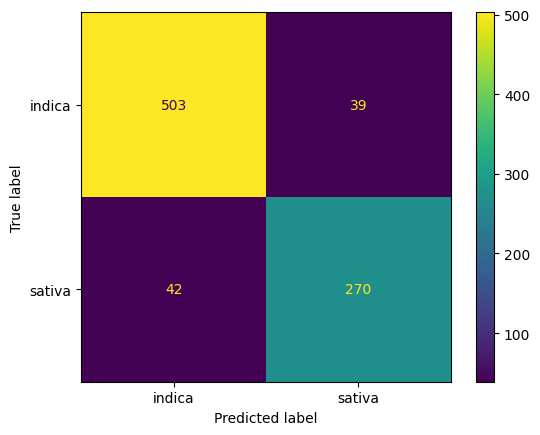

In [35]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Pipeline for QDA
qda_pipe = Pipeline([
    ("ct", ct),  # Reuse ColumnTransformer from earlier
    ("qda", QuadraticDiscriminantAnalysis())
])

# Parameter grid for QDA
paramgridqda = {
    "qda__reg_param": [0.0, 0.1, 0.5, 0.9]  # Regularization parameter
}

# GridSearchCV for QDA
qda_grid = GridSearchCV(
    qda_pipe,
    param_grid=paramgridqda,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)
qda_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best QDA params: {qda_grid.best_params_}")
print(f"Best QDA score: {qda_grid.best_score_}")

qda_final_model = qda_grid.best_estimator_
y_pred_qda = qda_final_model.predict(X_train)
conf_matrix_qda = confusion_matrix(y_train, y_pred_qda)
ConfusionMatrixDisplay(conf_matrix_qda, display_labels=qda_final_model.classes_).plot()

###Q3: SVC

Best SVC params: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best SVC cross-validated score: 0.8723495012039904


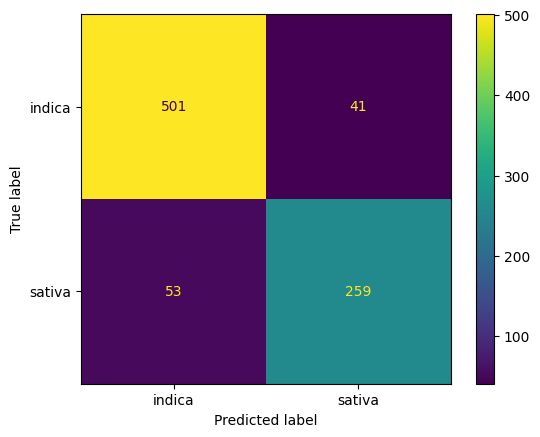

In [36]:
from sklearn.svm import SVC

# Pipeline for SVC
svc_pipe = Pipeline([
    ("ct", ct),  # Reuse ColumnTransformer from earlier
    ("svc", SVC())
])

# Parameter grid for SVC
paramgridsvc = {
    "svc__C": [0.1, 1, 10],  # Regularization parameter
    "svc__kernel": ["linear", "rbf"],  # Kernel types
    "svc__gamma": ["scale", "auto"]  # Gamma options
}

# GridSearchCV for SVC
svc_grid = GridSearchCV(
    svc_pipe,
    param_grid=paramgridsvc,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)
svc_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best SVC params: {svc_grid.best_params_}")
print(f"Best SVC cross-validated score: {svc_grid.best_score_}")

# Final model fitting and confusion matrix
svc_final_model = svc_grid.best_estimator_
y_pred_svc = svc_final_model.predict(X_train)
conf_matrix_svc = confusion_matrix(y_train, y_pred_svc)
ConfusionMatrixDisplay(conf_matrix_svc, display_labels=svc_final_model.classes_).plot()

###Q4: SVM

Best SVM params: {'svm__C': 1, 'svm__degree': 4, 'svm__gamma': 'scale'}
Best SVM cross-validated score: 0.866501547987616


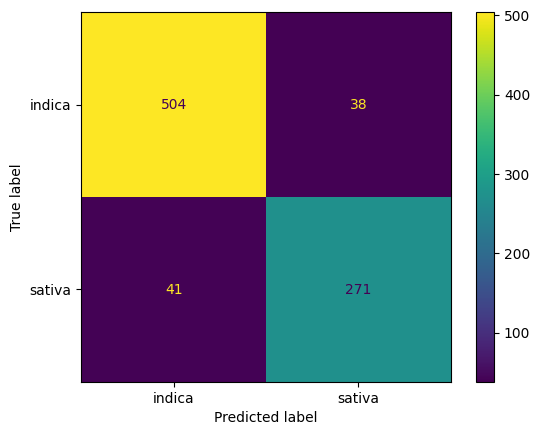

In [37]:
# Pipeline for SVM with polynomial kernel
svm_pipe = Pipeline([
    ("ct", ct),  # Reuse ColumnTransformer from earlier
    ("svm", SVC(kernel="poly"))  # Use polynomial kernel
])

# Parameter grid for SVM with polynomial kernel
paramgridsvm = {
    "svm__C": [0.1, 1, 10],  # Regularization parameter
    "svm__degree": [2, 3, 4],  # Polynomial degree
    "svm__gamma": ["scale", "auto"]  # Gamma options
}

# GridSearchCV for SVM
svm_grid = GridSearchCV(
    svm_pipe,
    param_grid=paramgridsvm,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)
svm_grid.fit(X_train, y_train)

# Best parameters and score
print(f"Best SVM params: {svm_grid.best_params_}")
print(f"Best SVM cross-validated score: {svm_grid.best_score_}")

# Final model fitting and confusion matrix
svm_final_model = svm_grid.best_estimator_
y_pred_svm = svm_final_model.predict(X_train)
conf_matrix_svm = confusion_matrix(y_train, y_pred_svm)
ConfusionMatrixDisplay(conf_matrix_svm, display_labels=svm_final_model.classes_).plot()

##Part Two: Natural Multiclass
Now use the full dataset, including the Hybrid strains.

In [12]:
X1= df.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y1= df["Type"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

###Q1
Fit a decision tree, plot the final fit, and interpret the results.

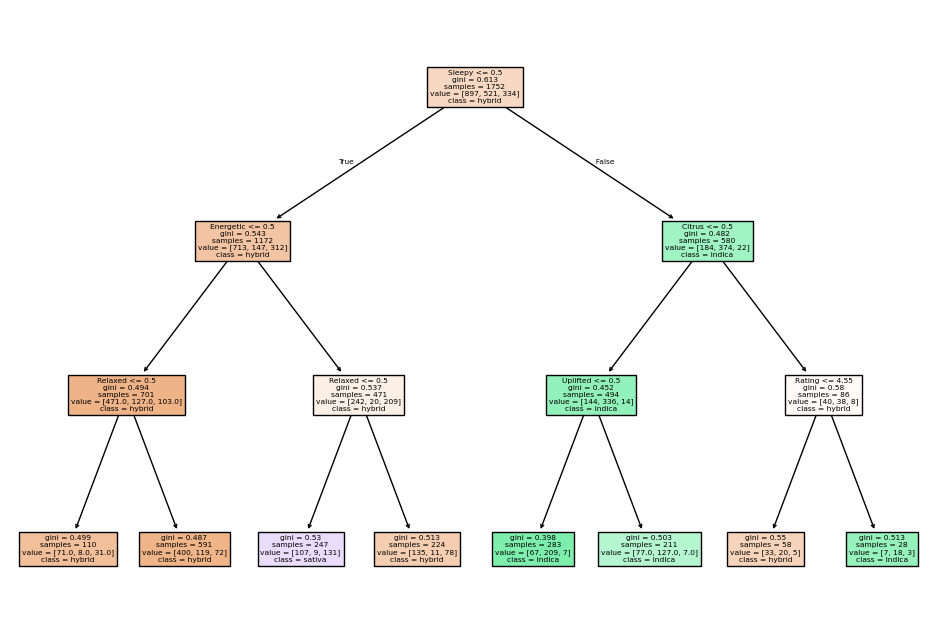

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Accuracy: 0.6104783599088838


In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
#tune decision tree
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_searchdt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_searchdt.fit(X1_train, y1_train)

#fit the best model
besttree = grid_searchdt.best_estimator_
besttree.fit(X1_train, y1_train)

#plot the tree
plt.figure(figsize=(12, 8))
plot_tree(besttree, feature_names=X.columns, class_names=besttree.classes_, filled=True)
plt.show()

#print best parameters and accuracy
print("Best Parameters:", grid_searchdt.best_params_)
print("Test Accuracy:", besttree.score(X1_test, y1_test))

###Q2
Repeat the analyses from Part One for LDA, QDA, and KNN.

Best LDA params: {'lda__shrinkage': 'auto', 'lda__solver': 'lsqr'}
Best LDA cross-validated score: 0.6347415547415547


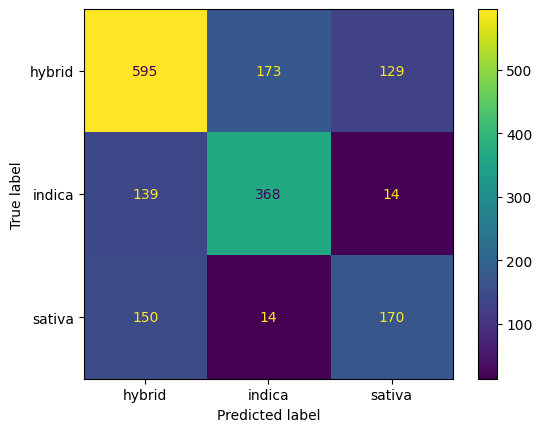

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Pipeline for LDA
lda_pipe = Pipeline([
    ("ct", ct),
    ("lda", LinearDiscriminantAnalysis())
])

# Parameter grid for LDA
paramgridlda = {
    "lda__solver": ["lsqr"],
    "lda__shrinkage": [None, "auto", 0.5]
}

# GridSearchCV for LDA
lda_grid = GridSearchCV(
    lda_pipe,
    param_grid=paramgridlda,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)
lda_grid.fit(X1_train, y1_train)

# Best parameters and score
print(f"Best LDA params: {lda_grid.best_params_}")
print(f"Best LDA cross-validated score: {lda_grid.best_score_}")

# Final model fitting and confusion matrix
lda_final_model = lda_grid.best_estimator_
y1_pred_lda = lda_final_model.predict(X1_train)
conf_matrix_lda = confusion_matrix(y1_train, y1_pred_lda)
ConfusionMatrixDisplay(conf_matrix_lda, display_labels=lda_final_model.classes_).plot()

Best QDA params: {'qda__reg_param': 0.3}
Best QDA cross-validated score: 0.6347203907203908


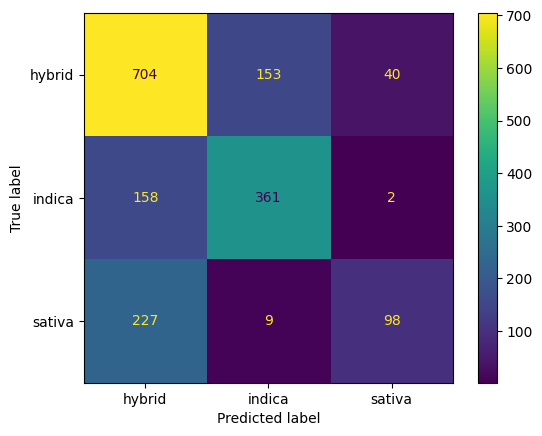

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Pipeline for QDA
qda_pipe = Pipeline([
    ("ct", ct),
    ("qda", QuadraticDiscriminantAnalysis())
])

# Parameter grid for QDA
paramgridqda = {
    "qda__reg_param": [0.0, 0.1,.2,.3,.4, 0.5,.6,.7,.8, 0.9]  # Regularization parameter
}

# GridSearchCV for QDA
qda_grid = GridSearchCV(
    qda_pipe,
    param_grid=paramgridqda,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)
qda_grid.fit(X1_train, y1_train)

# Best parameters and score
print(f"Best QDA params: {qda_grid.best_params_}")
print(f"Best QDA cross-validated score: {qda_grid.best_score_}")

# Final model fitting and confusion matrix
qda_final_model = qda_grid.best_estimator_
y_pred_qda1 = qda_final_model.predict(X1_train)
conf_matrix_qda = confusion_matrix(y1_train, y_pred_qda1)
ConfusionMatrixDisplay(conf_matrix_qda, display_labels=qda_final_model.classes_).plot()

Best KNN params: {'knn__n_neighbors': 10, 'knn__weights': 'uniform'}
Best KNN cross-validated score: 0.5885079365079365


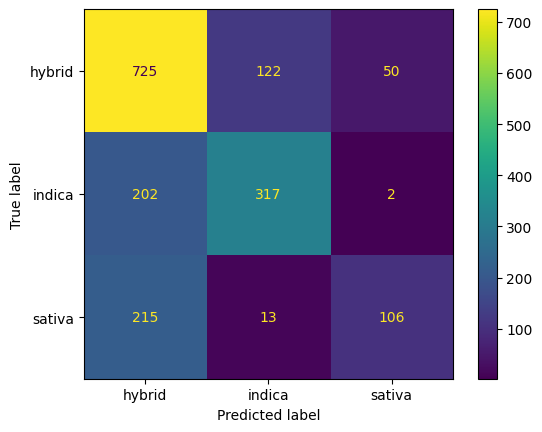

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Pipeline for KNN
knn_pipe = Pipeline([
    ("ct", ct),
    ("knn", KNeighborsClassifier())
])

# Parameter grid for KNN
paramgridknn = {
    "knn__n_neighbors": [3, 5, 7, 10],
    "knn__weights": ["uniform", "distance"]
}

# GridSearchCV for KNN
knn_grid = GridSearchCV(
    knn_pipe,
    param_grid=paramgridknn,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)
knn_grid.fit(X1_train, y1_train)

# Best parameters and score
print(f"Best KNN params: {knn_grid.best_params_}")
print(f"Best KNN cross-validated score: {knn_grid.best_score_}")

# Final model fitting and confusion matrix
knn_final_model = knn_grid.best_estimator_
y_pred_knn1 = knn_final_model.predict(X1_train)
conf_matrix_knn = confusion_matrix(y1_train, y_pred_knn1)
ConfusionMatrixDisplay(conf_matrix_knn, display_labels=knn_final_model.classes_).plot()

###Q3
Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

My answers in part one were better than my answers in part 2 based off of accuracy. This makes sense because instead of having only one possible wrong answer there is now two. Additionally, the concept of a hybrid is that is has both indica and sativa traits so it makes sense that is what is most likely to get wrong/mixed up. You can see that it did the best at predicting the hybrids but not too great of a job guessing the sativa and indica.

##Part Three: Multiclass from Binary
Consider two models designed for binary classification: SVC and Logistic Regression.

###Q1
Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

Indica vs. Not Indica

Sativa vs. Not Sativa

Hybrid vs. Not Hybrid

In [21]:
#predictors and target
X2 = df.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y2 = df["Type"]
class_labels = ["indica", "sativa", "hybrid"]

#loop for svc
for label in class_labels:
    #binary target for the class to loop
    y2_binary = np.where(y2 == label, 1, 0)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_binary, test_size=0.2, stratify=y2_binary, random_state=42)

    #train svc
    svc = SVC(probability=True, random_state=1)
    svc.fit(X2_train, y2_train)

    #evaluate
    y2_pred = svc.predict(X2_test)
    print(f"Metrics for SVC: {label} vs. Not {label}")
    print(classification_report(y2_test, y2_pred))

Metrics for SVC: indica vs. Not indica
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       307
           1       0.67      0.67      0.67       132

    accuracy                           0.80       439
   macro avg       0.76      0.77      0.76       439
weighted avg       0.80      0.80      0.80       439

Metrics for SVC: sativa vs. Not sativa
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       357
           1       0.00      0.00      0.00        82

    accuracy                           0.81       439
   macro avg       0.41      0.50      0.45       439
weighted avg       0.66      0.81      0.73       439

Metrics for SVC: hybrid vs. Not hybrid
              precision    recall  f1-score   support

           0       0.69      0.46      0.55       214
           1       0.61      0.80      0.69       225

    accuracy                           0.64       439
   macro av

In [22]:
#for logr

#loop for ovr
for label in class_labels:
    #binary target for the class to loop
    y2_binary = np.where(y2 == label, 1, 0)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_binary, test_size=0.2, stratify=y2_binary, random_state=42)

    #train logistic model
    lr = LogisticRegression(random_state=1)
    lr.fit(X2_train, y2_train)

    #evaluate
    y3_pred = lr.predict(X2_test)
    print(f"Metrics for Logistic Regression: {label} vs. Not {label}")
    print(classification_report(y2_test, y3_pred))

Metrics for Logistic Regression: indica vs. Not indica
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       307
           1       0.76      0.68      0.72       132

    accuracy                           0.84       439
   macro avg       0.81      0.79      0.80       439
weighted avg       0.83      0.84      0.84       439

Metrics for Logistic Regression: sativa vs. Not sativa
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       357
           1       0.40      0.23      0.29        82

    accuracy                           0.79       439
   macro avg       0.62      0.58      0.59       439
weighted avg       0.76      0.79      0.77       439

Metrics for Logistic Regression: hybrid vs. Not hybrid
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       214
           1       0.66      0.74      0.70       225

    accuracy     

###Q2
Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

Looking at the accuracy score average for all three binarys my logistic model did better at accuratly predicting each strain type overally. The model that worked the best was logistic predicting sativa strains. Adn logistic regression did the best at predicting sativa and hybrid. However overall hyrbid had the lowest accuracy score between both models, this makes sense because it has traits of both strain so can easily be confused with either.

###Q3
Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

Indica vs. Sativa

Indica vs. Hybrid

Hybrid vs. Sativa

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Predictors and target
X2 = df.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y2 = df["Type"]

# Define OvO class pairs
ovo_pairs = [("indica", "sativa"), ("indica", "hybrid"), ("hybrid", "sativa")]

# Loop through class pairs for SVC
for pair in ovo_pairs:
    # Filter data for the current pair
    pair_mask = y2.isin(pair)
    X2_pair = X2[pair_mask]
    y2_pair = y2[pair_mask]

    # Encode binary target for the current pair
    y2_binary = np.where(y2_pair == pair[0], 1, 0)  # 1 for the first class, 0 for the second

    # Train-test split
    X2_train, X2_test, y2_train, y2_test = train_test_split(
        X2_pair, y2_binary, test_size=0.2, stratify=y2_binary, random_state=42
    )

    # Train SVC
    svc = SVC(probability=True, kernel="linear", random_state=1)
    svc.fit(X2_train, y2_train)

    # Evaluate
    y2_pred = svc.predict(X2_test)
    print(f"Metrics for SVC: {pair[0]} vs. {pair[1]}")
    print(classification_report(y2_test, y2_pred))


Metrics for SVC: indica vs. sativa
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.91      0.91      0.91       132

    accuracy                           0.89       214
   macro avg       0.88      0.88      0.88       214
weighted avg       0.89      0.89      0.89       214

Metrics for SVC: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       225
           1       0.63      0.67      0.65       132

    accuracy                           0.73       357
   macro avg       0.71      0.72      0.71       357
weighted avg       0.73      0.73      0.73       357

Metrics for SVC: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        82
           1       0.78      0.95      0.86       225

    accuracy                           0.77       307
   macro avg       0.72

In [29]:
#for logr
# Predictors and target
X2 = df.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y2 = df["Type"]

# Define OvO class pairs
ovo_pairs = [("indica", "sativa"), ("indica", "hybrid"), ("hybrid", "sativa")]

#for logistic
for pair in ovo_pairs:
    # Filter data for the current pair
    pair_mask = y2.isin(pair)
    X2_pair = X2[pair_mask]
    y2_pair = y2[pair_mask]

    # Encode binary target for the current pair
    y2_binary = np.where(y2_pair == pair[0], 1, 0)  # 1 for the first class, 0 for the second

    # Train-test split
    X2_train, X2_test, y2_train, y2_test = train_test_split(
        X2_pair, y2_binary, test_size=0.2, stratify=y2_binary, random_state=42
    )

    # Train Logistic Regression
    logreg = LogisticRegression(max_iter=1000, random_state=1)
    logreg.fit(X2_train, y2_train)

    # Evaluate
    y2_pred = logreg.predict(X2_test)
    print(f"Metrics for Logistic Regression: {pair[0]} vs. {pair[1]}")
    print(classification_report(y2_test, y2_pred))


Metrics for Logistic Regression: indica vs. sativa
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.90      0.92      0.91       132

    accuracy                           0.89       214
   macro avg       0.89      0.88      0.89       214
weighted avg       0.89      0.89      0.89       214

Metrics for Logistic Regression: indica vs. hybrid
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       225
           1       0.67      0.64      0.66       132

    accuracy                           0.75       357
   macro avg       0.73      0.73      0.73       357
weighted avg       0.75      0.75      0.75       357

Metrics for Logistic Regression: hybrid vs. sativa
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        82
           1       0.80      0.92      0.85       225

    accuracy                 

###Q4
Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

The best model is the logistic regression model for identifing sativa vs indica. Although it has matching accuracy scores with the svc model, a logicistic model is more interpretable thus a better model.
The model that did the worst is the svc model at predicitng indica vs hyrbid. Although it isn't supprising that the model that did the worst was against hyrbid but I would have thought it would be sativa vs hybrid. Because my past models often mixed up these strains the most.

###Q5
Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

chat helped me understand the sklearn documentation.
Logistic regression defaults to OvR: Logistic regression does not inherently work with multiple classes in its traditional form, and OvR offers a simple and scalable extension to multi-class problems. Multinomial logistic regression requires additional solver compatibility, as it involves a more complex optimization.


SVC defaults to OvO: OvO is preferred for SVMs because training SVMs on binary subproblems is computationally efficient and results in simpler models compared to OvR. Each pairwise classifier only deals with two classes, leading to faster training times on small datasets and reduced memory usage.

